# QiskitRuntimeService

1. Primeiro passo:
* Renova o qiskit: pip install qiskit -U
* Renova o qiskit-ibm-runtime: pip install qiskit-ibm-runtime -U

Se quer instalar ao invéz de renovar, tira o -U dos comandos.

2. Segundo passo: <br>
Tendo criado o API token, copie como abaixo para salvar sua conta na memória (disco). Depois crie a variável serviço e defina a partir dela o backend a ser usado.

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService
# Save an IBM Quantum account.
QiskitRuntimeService.save_account(channel='ibm_quantum', 
                                  #channel='ibm_cloud', 
                                  token='17efde49764005e8eeb00dd065d44bc208778be72d44b475e508d20504818786f842988b0e506515c78debdd1b0c4b570717863db5e4f85569fb43c4c8626b8a',
                                  overwrite=True)
service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main'
    #instance='ibm-q-research-2/federal-uni-sant-1/main'
)

3. Terceiro passo

Teste sua instalação e configuração.

In [3]:
program_inputs = {'iterations': 1}
options = {"backend_name": "ibmq_qasm_simulator"}
job = service.run(program_id="hello-world",
                  options=options,
                  inputs=program_inputs
                 )
#print(f"job id: {job.job_id()}")
result = job.result()
print(result)

runtime_job._start_websocket_client:WARNING:2022-12-19 17:10:56,195: An error occurred while streaming results from the server for job cegcaf5iubo7eglqcqj0:
Traceback (most recent call last):
  File "/Users/jonasmaziero/opt/anaconda3/lib/python3.8/site-packages/qiskit_ibm_runtime/runtime_job.py", line 454, in _start_websocket_client
    self._ws_client.job_results()
  File "/Users/jonasmaziero/opt/anaconda3/lib/python3.8/site-packages/qiskit_ibm_runtime/api/clients/runtime_ws.py", line 70, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "/Users/jonasmaziero/opt/anaconda3/lib/python3.8/site-packages/qiskit_ibm_runtime/api/clients/base.py", line 230, in stream
    raise WebsocketError(error_message)
qiskit_ibm_runtime.api.exceptions.WebsocketError: 'Max retries exceeded: Failed to establish a websocket connection.'



Hello, World!


4. Quarto passo

Escolha um primitive para executar: Estimator ou Sampler.

## Estimator
Dado um ou mais circuitos, o Estimator calcula eficientemente, com mitigação de erros, o valor esperado de um ou mais observáveis. 

### Um circuito, um job
Primeiramente, vejamos um exemplo no qual usamos o Estimator para estimar o valor esperado de um único par circuito-observável, ou seja, temos um circuito e um observável.

In [4]:
backend = service.get_backend("ibmq_qasm_simulator")

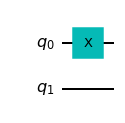

 > Observable: ['IZ']
 > Expectation value: -1.0
 > Metadata: {}


In [5]:
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
from qiskit import QuantumCircuit

#circuit = random_circuit(2, 2, seed=1).decompose(reps=1)
circuit = QuantumCircuit(2)
circuit.x(0)
circuit.draw(output='mpl')
observable = SparsePauliOp("IZ") # ordem ...210

#options = {"backend_name": "ibmq_qasm_simulator"}
estimator = Estimator()#options=options)
job = estimator.run(circuit, observable)
result = job.result()

display(circuit.draw("mpl"))
print(f" > Observable: {observable.paulis}")
print(f" > Expectation value: {result.values[0]}")
print(f" > Metadata: {result.metadata[0]}")

### Vários circuitos, um único job

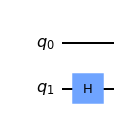

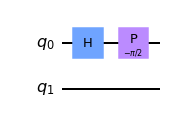

 > Observables: [PauliList(['XZ']), PauliList(['IY'])]
 > Expectation values: [0.9999999999999998, -0.9999999999999998]
 > Metadata: [{}, {}]


In [6]:
import math
qc1 = QuantumCircuit(2); qc2 = QuantumCircuit(2)
qc1.h(1)
qc2.h(0); qc2.p(-math.pi/2, 0)

circuits = (
    #random_circuit(2, 2, seed=0).decompose(reps=1),
    #random_circuit(2, 2, seed=1).decompose(reps=1),
    qc1, qc2
)
observables = (
    SparsePauliOp("XZ"),
    SparsePauliOp("IY"),
)

estimator = Estimator()
job = estimator.run(circuits, observables)
result = job.result()

[display(cir.draw("mpl")) for cir in circuits]
print(f" > Observables: {[obs.paulis for obs in observables]}")
print(f" > Expectation values: {result.values.tolist()}")
print(f" > Metadata: {result.metadata}")

### Executar vários circuitos quânticos em paralelo

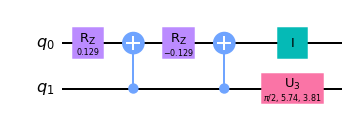

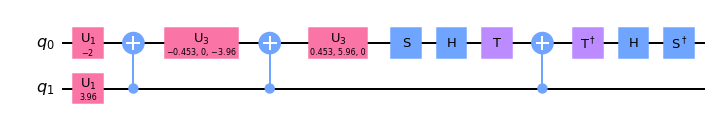

 > Observables: [PauliList(['XZ']), PauliList(['IY'])]
 > Expectation values [0]: 0.8534781134132173
 > Metadata [0]: {}
 > Expectation values [1]: -1.1102230246251563e-16
 > Metadata [1]: {}


In [7]:
circuits = (
    random_circuit(2, 2, seed=0).decompose(reps=1),
    random_circuit(2, 2, seed=1).decompose(reps=1),
)
observables = (
    SparsePauliOp("XZ"),
    SparsePauliOp("IY"),
)

estimator = Estimator()
job_0 = estimator.run(circuits[0], observables[0])
job_1 = estimator.run(circuits[1], observables[1])
result_0 = job_0.result()
result_1 = job_1.result()

[display(cir.draw("mpl")) for cir in circuits]
print(f" > Observables: {[obs.paulis for obs in observables]}")
print(f" > Expectation values [0]: {result_0.values.tolist()[0]}")
print(f" > Metadata [0]: {result_0.metadata[0]}")
print(f" > Expectation values [1]: {result_1.values.tolist()[0]}")
print(f" > Metadata [1]: {result_1.metadata[0]}")

### Executando circuitos parametrizados

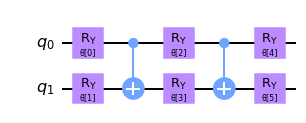

 > Observable: ['ZI']
 > Parameter values: [0, 1, 2, 3, 4, 5]
 > Expectation value: [-0.64855684]
 > Metadata: {}


In [8]:
from qiskit.circuit.library import RealAmplitudes

circuit = RealAmplitudes(num_qubits=2, reps=2).decompose(reps=1)
observable = SparsePauliOp("ZI")
parameter_values = [0, 1, 2, 3, 4, 5]

estimator = Estimator()
job = estimator.run(circuit, observable, parameter_values)
result = job.result()

display(circuit.draw("mpl"))
print(f" > Observable: {observable.paulis}")
print(f" > Parameter values: {parameter_values}")
print(f" > Expectation value: {result.values}")
print(f" > Metadata: {result.metadata[0]}")

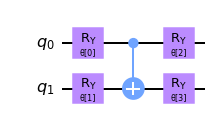

In [9]:
circuit = RealAmplitudes(num_qubits=2, reps=1).decompose(reps=1)
display(circuit.draw("mpl"))

### Executando nos chips reais

runtime_job._start_websocket_client:WARNING:2022-12-19 17:12:28,179: An error occurred while streaming results from the server for job cegcb5tiubo7eglqcseg:
Traceback (most recent call last):
  File "/Users/jonasmaziero/opt/anaconda3/lib/python3.8/site-packages/qiskit_ibm_runtime/runtime_job.py", line 454, in _start_websocket_client
    self._ws_client.job_results()
  File "/Users/jonasmaziero/opt/anaconda3/lib/python3.8/site-packages/qiskit_ibm_runtime/api/clients/runtime_ws.py", line 70, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "/Users/jonasmaziero/opt/anaconda3/lib/python3.8/site-packages/qiskit_ibm_runtime/api/clients/base.py", line 230, in stream
    raise WebsocketError(error_message)
qiskit_ibm_runtime.api.exceptions.WebsocketError: 'Max retries exceeded: Failed to establish a websocket connection.'



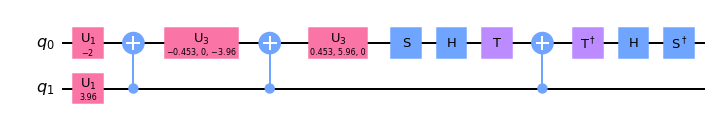

 > Observable: ['IY']
 > Expectation value: 0.006625000000000004
 > Metadata: {'zne': {'noise_amplification': {'noise_amplifier': "<TwoQubitAmplifier:{'noise_factor_relative_tolerance': 0.01, 'random_seed': None, 'sub_folding_option': 'from_first'}>", 'noise_factors': [1, 3, 5], 'values': [0.005, 0.0205, 0.0135], 'variance': [0.999975, 0.99957975, 0.99981775], 'shots': [4000, 4000, 4000]}, 'extrapolation': {'extrapolator': 'LinearExtrapolator'}}}


In [10]:
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Estimator, Options

circuit = random_circuit(2, 2, seed=1).decompose(reps=1)
observable = SparsePauliOp("IY")

options = Options()
options.optimization_level = 2
options.resilience_level = 2

service = QiskitRuntimeService()
with Session(service=service, backend="ibmq_qasm_simulator") as session:
    estimator = Estimator(session=session, options=options)
    job = estimator.run(circuit, observable)

result = job.result()

display(circuit.draw("mpl"))
print(f" > Observable: {observable.paulis}")
print(f" > Expectation value: {result.values[0]}")
print(f" > Metadata: {result.metadata[0]}")

In [ ]:
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Estimator, Options

circuit = random_circuit(2, 2, seed=1).decompose(reps=1)
observable = SparsePauliOp("IY")

options = Options()
options.optimization_level = 2
options.resilience_level = 2

service = QiskitRuntimeService()
with Session(service=service, backend="ibmq_belem") as session:
    estimator = Estimator(session=session, options=options)
    job = estimator.run(circuit, observable)

result = job.result()

display(circuit.draw("mpl"))
print(f" > Observable: {observable.paulis}")
print(f" > Expectation value: {result.values[0]}")
print(f" > Metadata: {result.metadata[0]}")

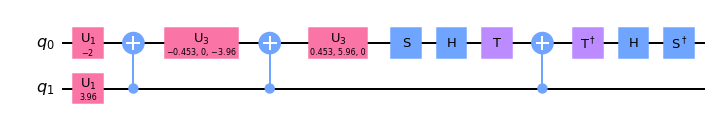

 > Observable: ['IY']
 > Expectation value: -1.1102230246251563e-16
 > Metadata: {}


In [101]:
from qiskit_ibm_runtime import Session, Options

circuit = random_circuit(2, 2, seed=1).decompose(reps=1)
observable = SparsePauliOp("IY")

options = Options()
options.optimization_level = 2
options.resilience_level = 2

service = QiskitRuntimeService()
backend = service.get_backend("ibmq_belem")
with Session(service=service, backend=backend):
    estimator = Estimator()
    job = estimator.run(circuit, observable)

result = job.result()

display(circuit.draw("mpl"))
print(f" > Observable: {observable.paulis}")
print(f" > Expectation value: {result.values[0]}")
print(f" > Metadata: {result.metadata[0]}")

## Sampler

O primitive Sampler gera distribuições de quasi-probabilidades a partir de um circuito quântico definido.

Começamos com um único circuito quântico.

In [ ]:
from qiskit.circuit.random import random_circuit
from qiskit.primitives import Sampler

circuit = random_circuit(2, 2, seed=1).decompose(reps=1)
circuit.measure_all()

sampler = Sampler()
job = sampler.run(circuit)
result = job.result()

display(circuit.draw("mpl"))
print(f" > Quasi probability distribution: {result.quasi_dists[0]}")
#print(f" > Metadata: {result.metadata[0]}")
#print(result.quasi_dists,result.quasi_dists[0][1])
print(result.quasi_dists[0][0]+result.quasi_dists[0][1]+result.quasi_dists[0][2]+result.quasi_dists[0][3])

Executando múltiplos experimentos em um único job.

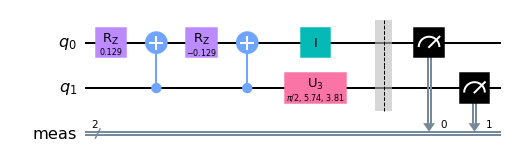

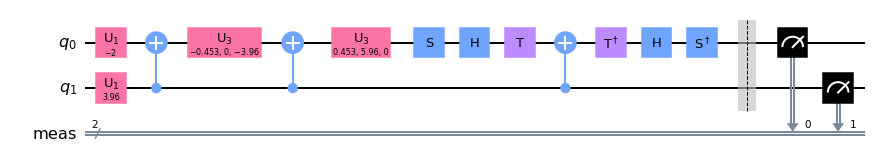

 > Quasi probability distributions: [{0: 0.4999999999999999, 1: 0.0, 2: 0.4999999999999998, 3: 0.0}, {0: 0.9999999999999996, 1: 3.087157319438412e-33, 2: 0.0, 3: 0.0}]
 > Metadata: [{}, {}]


In [110]:
from qiskit.circuit.random import random_circuit
from qiskit.primitives import Sampler

circuits = (
random_circuit(2, 2, seed=0).decompose(reps=1),
random_circuit(2, 2, seed=1).decompose(reps=1),
)
[c.measure_all() for c in circuits]

sampler = Sampler()
job = sampler.run(circuits)
result = job.result()

[display(cir.draw("mpl")) for cir in circuits]
print(f" > Quasi probability distributions: {result.quasi_dists}")
#print(f" > Metadata: {result.metadata}")

Executando circuitos parametrizados.

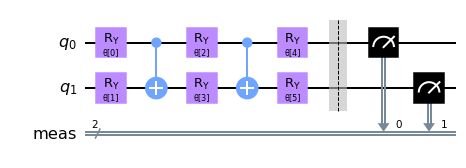

 > Parameter values: [0, 1, 2, 3, 4, 5]
 > Quasi probability distribution: {0: 0.1715845100481531, 1: 0.0041370682135240654, 2: 0.2040212941849271, 3: 0.6202571275533961}
 > Metadata: {}


In [113]:
from qiskit.circuit.library import RealAmplitudes
# RealAmplitudes is one way to generate a parametrized circuit
from qiskit.primitives import Sampler

circuit = RealAmplitudes(num_qubits=2, reps=2).decompose(reps=1)
circuit.measure_all()
parameter_values = [0, 1, 2, 3, 4, 5]

sampler = Sampler()
job = sampler.run(circuit, parameter_values)
result = job.result()

display(circuit.draw("mpl"))
print(f" > Parameter values: {parameter_values}")
print(f" > Quasi probability distribution: {result.quasi_dists[0]}")
print(f" > Metadata: {result.metadata[0]}")

Executando no chip real.

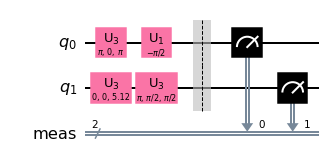

 > Quasi probability distribution: {3: 1.0}
 > Metadata: {'header_metadata': {}, 'shots': 4000, 'readout_mitigation_overhead': 1.0, 'readout_mitigation_time': 0.009805227629840374}


In [52]:
from qiskit.circuit.random import random_circuit
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler, Options
backend = service.get_backend("ibmq_qasm_simulator")

circuit = random_circuit(2, 2, seed=2).decompose(reps=1)
circuit.measure_all()

options = Options()
options.optimization_level = 2
options.resilience_level = 0

service = QiskitRuntimeService()
with Session(service=service, backend=backend):
    sampler = Sampler()
    job = sampler.run(circuit)

result = job.result()

display(circuit.draw("mpl"))
print(f" > Quasi probability distribution: {result.quasi_dists[0]}")
print(f" > Metadata: {result.metadata[0]}")

In [ ]:
from qiskit.circuit.random import random_circuit
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler, Options
backend = service.get_backend("ibmq_quito")

circuit = random_circuit(2, 2, seed=2).decompose(reps=1)
circuit.measure_all()

options = Options()
options.optimization_level = 2
options.resilience_level = 0

service = QiskitRuntimeService()
with Session(service=service, backend=backend):
    sampler = Sampler()
    job = sampler.run(circuit)
    print(job.job_id())

result = job.result()

display(circuit.draw("mpl"))
print(f" > Quasi probability distribution: {result.quasi_dists[0]}")
print(f" > Metadata: {result.metadata[0]}")

cdtrum89dr0di7m6u73g


### Referências

1. https://qiskit.org/documentation/partners/qiskit_ibm_runtime/

2. https://quantum-computing.ibm.com/services/programs/docs/runtime/programs/start

3. https://quantum-computing.ibm.com/services/programs/primitives?program=estimator

4. https://youtu.be/gSK3XRuLKB4

5. https://quantum-computing.ibm.com/services/programs/primitives?tab=estimator

6. https://quantum-computing.ibm.com/services/programs/primitives?program=sampler

A princípio, esses o Estimator e Sampler nos permitem executar programas com maior eficiência. No entanto, existem limites tanto para o tempo de execução quanto para os tamanhos dos programas enviados e para os dados de entrada:

7. https://qiskit.org/documentation/partners/qiskit_ibm_runtime/faqs/max_execution_time.html

8. https://youtu.be/b9mdMye-iVk

9. Blog post: So, what is Qiskit Runtime, Anyway? https://medium.com/qiskit/so-what-is-qiskit-runtime-anyway-c78aecf3742